# Analysis Pipeline

Given any segment of time-series data:
- Compute spectrogram (with window length and step length parameters)
- Fit exponential distribution over all frequencies and compute KS test value & p-value
- Compute SCV over same period (maybe throw out 1% outliers?)
- Compute the PSD from that time period (compute the spectrogram mean over time bins)
- Fooof PSD in 3 differe ways (take care to ignore 60Hz power line), and for each, save the fitted slope, offset, and fit error:

     1. Fit straight line over all frequencies (2-80Hz)

     2. Fit lorentzian over all frequencies (2-80Hz)

     3. Fit straight line over only the frequency ranges that are not significant under KS test

In [2]:
cd ..

C:\Users\Lauren\Voytek\spectralCV


In [5]:
from scv_funcs import access_nt as asc
import numpy as np
import neurodsp as ndsp
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
class spec_fit:
    import neurodsp as ndsp
    from scipy.stats import expon
    import scipy as sp
    def __init__(self,data,fs,nperseg,noverlap):
        self.data = data
        self.fs = fs
        self.nperseg = nperseg
        self.noverlap = noverlap
    def psd(self):
        f, psd_ = ndsp.spectral.psd(data, Fs=fs, nperseg=nperseg, noverlap=noverlap)
        return psd_
    def ks_expfit(self,data_slice):
        f_axis_, t_axis_, spg_ = sp.signal.spectrogram(data[data_slice],fs=fs,nperseg=nperseg,noverlap=noverlap)
        pvals = np.zeros((len(spg_)))
        statistics = np.zeros((len(spg_)))
        for i in range(len(spg_)):
            param = sp.stats.expon.fit(spg_[i], floc=0)
            stat, pval = sp.stats.kstest(spg_[i], 'expon', args=param)
            pvals[i] = pval
            statistics[i] = stat
        return pvals, statistics
    def scv(self):
        freq, scv_ = ndsp.spectral.scv(data, Fs=fs, nperseg=nperseg, noverlap=noverlap, outlierpct=0.01)
        return scv_

In [28]:
data_anal = spec_fit(data,fs,nperseg,noverlap)

In [29]:
data_anal.ks_expfit(0)

(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.99840144e-15,   2.95319325e-14,   3.35109718e-12,
          8.88178420e-16,   0.00000000e+00,   0.00000000e+00,
          2.48689958e-14,   0.00000000e+00,   9.95253657e-10,
          1.44970891e-08,   1.85548027e-03,   6.68702235e-06,
          4.71474541e-03,   1.24235536e-01,   8.28974376e-02,
          9.72367020e-01,   1.37157070e-01,   7.47236066e-01,
          5.99149310e-01,   2.49473548e-02,   3.48203769e-01,
          4.58416144e-01,   5.01615073e-01,   1.06671567e-01,
          3.14874883e-02,   1.39993512e-01,   5.19042567e-01,
          5.61252106e-02,   3.48076982e-02,   3.56027976e-02,
          1.73643238e-02,   5.78897385e-02,   1.55747759e-02,
          3.94233449e-02,   4.68562389e-02,   3.94075379e-02,
        

In [9]:
data_path ="/Users/Lauren/Data/NeuroTycho/anesthesia/20120730PF_Anesthesia+and+Sleep_Chibi_Toru+Yanagawa_mat_ECoG128/Session%d/"
#data_path ="/Users/rdgao/Documents/data/NeuroTycho/Propofol/20120730PF_Anesthesia+and+Sleep_Chibi_Toru+Yanagawa_mat_ECoG128/Session%d/"
session = 1
chan = [1,2,3,4] # start at 1

# with specified indices
indices = [0,0]
data = asc.get_ECoG(data_path, session, chan, indices)

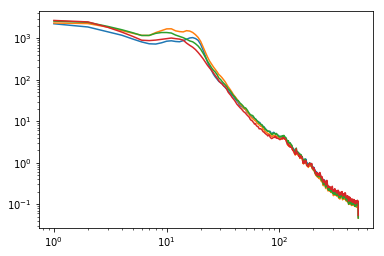

In [17]:
fs = 1000
nperseg = 1000
noverlap = 0
f, psd_ = ndsp.spectral.psd(data, Fs=fs, nperseg=nperseg, noverlap=noverlap)
#_, _, spg_ =
plt.loglog(f,psd_[0:,:].T);

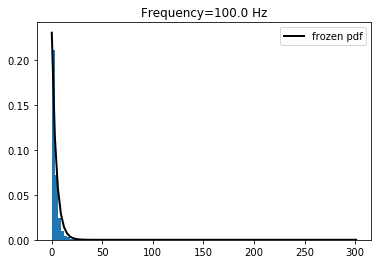

In [7]:
from scipy.stats import expon
import scipy as sp
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = expon.stats(moments='mvsk')
y = np.arange(1,50)
#ax.plot(x, expon.pdf(x),'r-', lw=5, alpha=0.6, label='expon pdf')
#_ = ax.plot(psd_[0][:100])
# _ = ax.plot(psd_[1])

fs = 1000
nperseg = 1000
noverlap = 0
freq_ind = 100
num_bins = 100

f_axis_, t_axis_, spg_ = sp.signal.spectrogram(data[0],fs=fs,nperseg=nperseg,noverlap=noverlap)
_, scale_ = sp.stats.expon.fit(spg_[freq_ind],floc=0)
hists = ax.hist(spg_[freq_ind],normed=True,bins=num_bins)
x = hists[1]
#x = np.linspace(0,500, 1000)
#ax.plot(x, expon.pdf(x),'r-', lw=5, label='expon pdf')
rv = expon(scale = scale_)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf',)
#plt.xlim(0,250)
#plt.ylim(0,0.0005)
plt.legend()
plt.title('Frequency=%.1f Hz' %f[freq_ind])